In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import median_absolute_error

In [89]:
data = pd.read_csv("weatherHistory_shortened.csv")

In [ ]:
data["date"] = np.zeros(len(data))
for i in range(len(data)):
    data["date"][i] = data["Formatted Date"][i][0:10]


data["time"] = np.zeros(len(data))
for i in range(len(data)):
    data["time"][i] = data["Formatted Date"][i][11:13]
    data["time"]

In [ ]:
import datetime
data["nth_day"] = np.zeros(len(data))
for i in range(len(data)):
    datetime.datetime.strptime(data["date"][i] ,'%Y-%m-%d')
    data["nth_day"][i] = datetime.datetime.strptime(data["date"][i],'%Y-%m-%d').timetuple().tm_yday
    data["nth_day"] = data["nth_day"].to_numpy(int)

data["nth_day"]

In [92]:
data['Date_new'] = pd.to_datetime(data['Formatted Date'], yearfirst=True)
data['Date_in_Days'] = data['Date_new'].map(lambda date:f'{30*(date.month-1) + date.day}') 
data['Date_in_Days'] = data['Date_in_Days'].to_numpy(dtype=int)
data

C:\Users\User\AppData\Local\Temp\ipykernel_15352\1318438620.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date_new'] = pd.to_datetime(data['Formatted Date'], yearfirst=True)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date,time,nth_day,Date_new,Date_in_Days
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,2006-04-01,00,91,2006-04-01 00:00:00+02:00,91
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,2006-04-01,01,91,2006-04-01 01:00:00+02:00,91
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,2006-04-01,02,91,2006-04-01 02:00:00+02:00,91
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,2006-04-01,03,91,2006-04-01 03:00:00+02:00,91
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,2006-04-01,04,91,2006-04-01 04:00:00+02:00,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2006-09-09 19:00:00.000 +0200,Partly Cloudy,rain,17.238889,17.238889,0.55,4.6207,1,9.9820,0,1027.11,Partly cloudy until night.,2006-09-09,19,252,2006-09-09 19:00:00+02:00,249
8780,2006-09-09 20:00:00.000 +0200,Partly Cloudy,rain,14.327778,14.327778,0.71,2.6082,26,10.3523,0,1027.66,Partly cloudy until night.,2006-09-09,20,252,2006-09-09 20:00:00+02:00,249
8781,2006-09-09 21:00:00.000 +0200,Partly Cloudy,rain,12.661111,12.661111,0.78,7.5509,90,9.9820,0,1028.13,Partly cloudy until night.,2006-09-09,21,252,2006-09-09 21:00:00+02:00,249
8782,2006-09-09 22:00:00.000 +0200,Partly Cloudy,rain,13.055556,13.055556,0.70,6.4400,100,15.8263,0,1028.62,Partly cloudy until night.,2006-09-09,22,252,2006-09-09 22:00:00+02:00,249


In [93]:
data['date'] = pd.to_datetime(data['date'], yearfirst=True)
data['date']

0      2006-04-01
1      2006-04-01
2      2006-04-01
3      2006-04-01
4      2006-04-01
          ...    
8779   2006-09-09
8780   2006-09-09
8781   2006-09-09
8782   2006-09-09
8783   2006-09-09
Name: date, Length: 8784, dtype: datetime64[ns]

In [94]:
data = data.sort_values(by=['date'], ascending=True).reset_index()
data

,index,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date,time,nth_day,Date_new,Date_in_Days
0,2902,2006-01-01 22:00:00.000 +0100,Overcast,rain,5.472222,1.377778,0.87,22.7171,149,14.7959,0,1009.51,Mostly cloudy throughout the day.,2006-01-01,22,1,2006-01-01 22:00:00+01:00,1
1,2901,2006-01-01 21:00:00.000 +0100,Overcast,rain,4.933333,0.555556,0.86,23.9407,139,15.7297,0,1009.43,Mostly cloudy throughout the day.,2006-01-01,21,1,2006-01-01 21:00:00+01:00,1
2,2900,2006-01-01 20:00:00.000 +0100,Overcast,rain,5.972222,1.861111,0.80,24.2305,140,11.2700,0,1009.39,Mostly cloudy throughout the day.,2006-01-01,20,1,2006-01-01 20:00:00+01:00,1
3,2899,2006-01-01 19:00:00.000 +0100,Overcast,rain,5.472222,1.100000,0.83,25.4058,145,10.9158,0,1009.55,Mostly cloudy throughout the day.,2006-01-01,19,1,2006-01-01 19:00:00+01:00,1
4,2898,2006-01-01 18:00:00.000 +0100,Overcast,rain,4.955556,0.383333,0.86,25.9371,149,11.1251,0,1009.76,Mostly cloudy throughout the day.,2006-01-01,18,1,2006-01-01 18:00:00+01:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,8044,2010-08-02 04:00:00.000 +0200,Clear,rain,16.094444,16.094444,0.99,3.0751,280,11.9784,0,1016.67,Partly cloudy starting in the afternoon contin...,2010-08-02,04,214,2010-08-02 04:00:00+02:00,212
8780,8043,2010-08-02 03:00:00.000 +0200,Clear,rain,16.622222,16.622222,0.99,6.4400,300,11.9784,0,1016.78,Partly cloudy starting in the afternoon contin...,2010-08-02,03,214,2010-08-02 03:00:00+02:00,212
8781,8042,2010-08-02 02:00:00.000 +0200,Clear,rain,18.072222,18.072222,0.98,11.2700,290,6.8425,0,1013.23,Partly cloudy starting in the afternoon contin...,2010-08-02,02,214,2010-08-02 02:00:00+02:00,212
8782,8051,2010-08-02 11:00:00.000 +0200,Clear,rain,28.561111,29.588889,0.54,3.2039,288,10.3523,0,1016.58,Partly cloudy starting in the afternoon contin...,2010-08-02,11,214,2010-08-02 11:00:00+02:00,212


In [95]:
data = data.copy()
data["Average temperature"] = data["Temperature (C)"]
data.groupby("nth_day")["Average temperature"].mean().reset_index()

,nth_day,Average temperature
0,1,3.873148
1,2,5.418519
2,3,2.319444
3,4,2.274074
4,5,2.698148
...,...,...
360,361,-2.033796
361,362,-4.684491
362,363,-1.553704
363,364,-1.741435


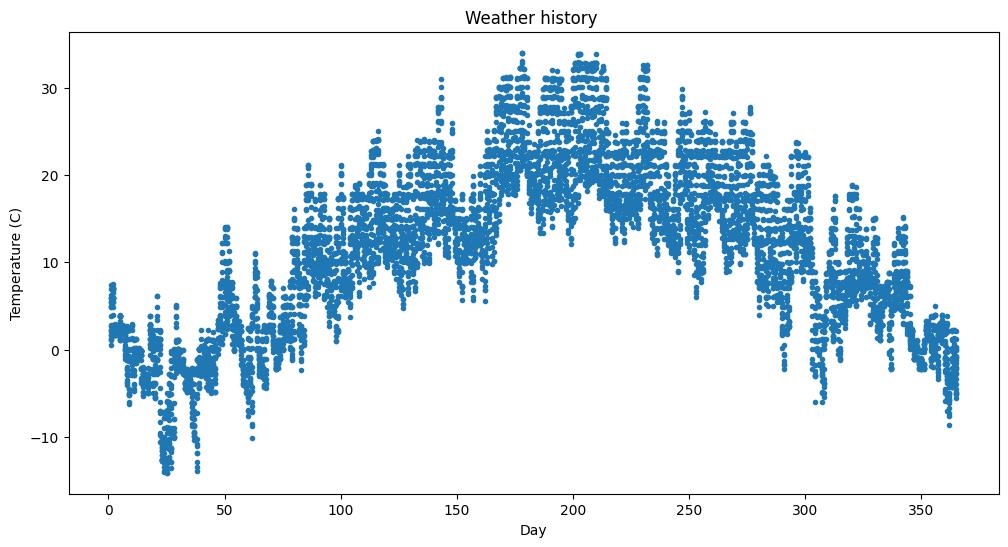

In [96]:
plt.figure(figsize=(12,6))

plt.scatter(data['nth_day'].to_numpy(), data['Average temperature'].to_numpy(), marker='.')
plt.title("Weather history ")
plt.xlabel("Day")
plt.ylabel("Temperature (C)")
plt.show()

In [105]:
X = data["nth_day"].copy().values
Y = data["Average temperature"].copy().values

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1) 
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7027, 1), (1757, 1), (7027, 1), (1757, 1))

In [106]:
class Perceptron:
    def __init__(self, learning_rate, input_length, activation_func):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(input_length)
        self.bias = np.random.rand(1)
        self.activation_function = activation_func     

    def activation(self, x, function):
        if function == "sigmoid":
            return 1 / (1 + np.exp(-x))
        elif function == "relu":
            return np.maximum(0, x)
        elif function == "tanh":
            return np.tanh(x)
        elif function == "linear":
            return x
        else:
            raise Exception("Unknown activation function")

    def fit(self, X_train, Y_train, X_test, Y_test, epochs):
        Loss_Train = []         
        Acc_Train = []          
        Loss_Test = []          
        Acc_Test = []           
        for epoch in tqdm(range(epochs)):
            for x, y in zip(X_train, Y_train):
                # forwarding 
                y_pred = x @ self.weights + self.bias
                y_pred = self.activation(y_pred , self.activation_function)     
                # y_pred = y_pred * self.activation(y_pred, "sigmoid")

                # back propagation
                error = y - y_pred

                # updating
                self.weights += self.learning_rate * error * x
                self.bias += self.learning_rate * error

            train_loss ,train_acc = model.evaluate(X_train , Y_train)           
            test_loss ,test_acc = model.evaluate(X_test , Y_test)               

            Loss_Train.append(train_loss)                                       
            Acc_Train.append(train_acc)                                         
            Loss_Test.append(test_loss)                                         
            Acc_Test.append(test_acc)                                           

        return Loss_Train, Acc_Train, Loss_Test, Acc_Test                      

    # def predict(self, X_test):
    #     Y_pred = []
    #     for x_test in X_test:
    #         y_pred = x_test @ self.weights + self.bias
    #         y_pred = self.activation(y_pred, "relu")
    #         Y_pred.append(y_pred)
    #     return np.array(Y_pred)
    
    def predict(self, X_test):
        y_pred = X_test @ self.weights + self.bias
        y_pred = self.activation(y_pred, "relu")

        return np.array(y_pred)

    def calculate_loss(self, X_test, Y_test, metric):
        Y_pred = self.predict(X_test)
        if metric == "mse":
            return np.mean(np.square(Y_test - Y_pred))
        elif metric == "mae":
            return np.mean(np.abs(Y_test - Y_pred))
        elif metric == "rmse":
            return np.sqrt(np.mean(np.square(Y_test - Y_pred)))
        else:
            raise Exception("Unknown metric")
        
    def calculate_accuracy(self, X_test, Y_test):
        Y_pred = self.predict(X_test)
        # Y_pred = Y_pred.reshape(-1)
        # Y_pred = np.where(Y_pred > 0.5, 1, 0)
        # accuracy = np.sum(Y_pred == Y_test) / len(Y_test)
        accuracy = median_absolute_error(Y_pred , Y_test)
        return accuracy

    def evaluate(self, X_test, Y_test):
        loss = self.calculate_loss(X_test, Y_test, "rmse")
        accuracy = self.calculate_accuracy(X_test, Y_test)

        return loss, accuracy
    
model = Perceptron(learning_rate=0.00001, input_length=X_train.shape[1], activation_func="relu")
Loss_Train, Acc_Train, Loss_Test, Acc_Test = model.fit(X_train, Y_train, X_test, Y_test, epochs=30)

100%|██████████| 30/30 [00:22<00:00,  1.31it/s]


In [107]:
model.evaluate(X_test, Y_test)

(10.907498766358792, 6.68625260475268)

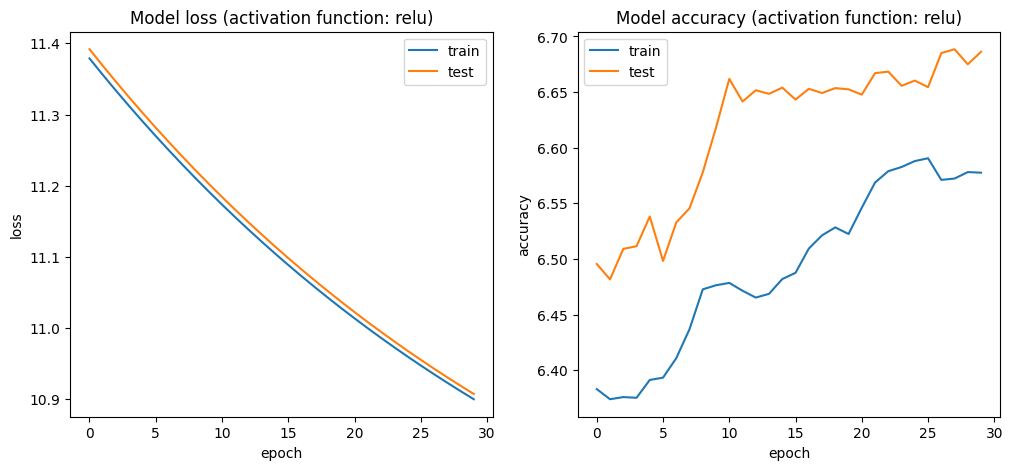

In [108]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize=(12,5))


ax1.plot(Loss_Train)
ax1.plot(Loss_Test)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend(["train" , "test"])
ax1.title.set_text(f'Model loss (activation function: relu)')

ax2.plot(Acc_Train)
ax2.plot(Acc_Test)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend(["train" , "test"])
ax2.title.set_text('Model accuracy (activation function: relu)')

plt.show()

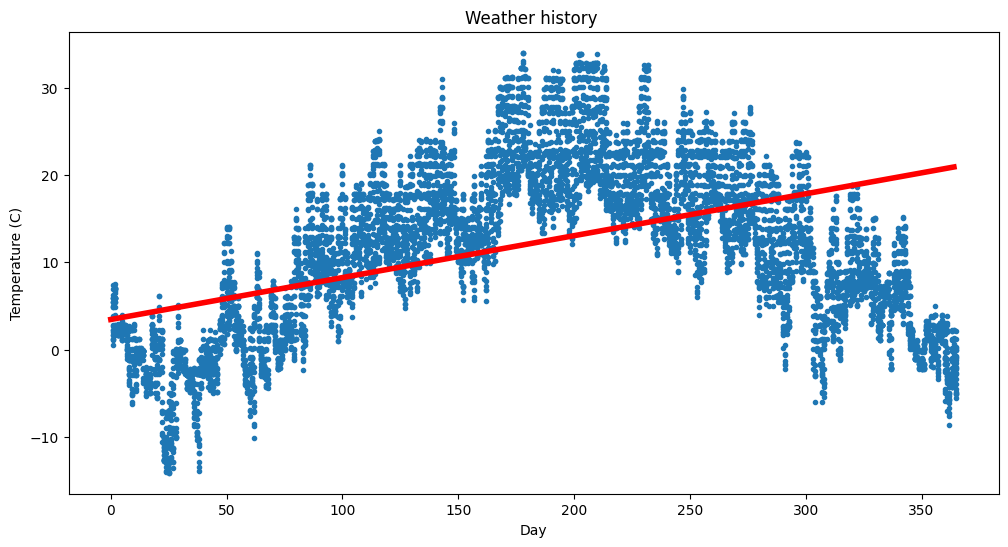

In [109]:
plt.figure(figsize=(12,6))

plt.scatter(data['nth_day'].to_numpy(), data['Average temperature'].to_numpy(), marker='.')
plt.plot(model.weights[0] *range(365) + model.bias[0] ,linewidth=4, c='red')
plt.title("Weather history ")
plt.xlabel("Day")
plt.ylabel("Temperature (C)")
plt.show()

In [110]:
model.predict(X_test[25])

array([8.97640844])